# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [53]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [24]:
# Load Dataset

# FETCH DATASET 1
CREDITS = pd.read_csv('credits.csv')

#FETCH DATASET 2
TITLES = pd.read_csv('titles.csv')

### Dataset First View

In [25]:
# Dataset First Look

# Display the first 5 rows of each dataset

print("CREDITS DATASET:")
print(CREDITS.head())

print("\n")

print("TITLES DATASET:")
print(TITLES.head())

CREDITS DATASET:
   person_id       id           name      character   role
0      59401  ts20945     Joe Besser            Joe  ACTOR
1      31460  ts20945     Moe Howard            Moe  ACTOR
2      31461  ts20945     Larry Fine          Larry  ACTOR
3      21174  tm19248  Buster Keaton    Johnny Gray  ACTOR
4      28713  tm19248    Marion Mack  Annabelle Lee  ACTOR


TITLES DATASET:
        id                        title   type  \
0  ts20945            The Three Stooges   SHOW   
1  tm19248                  The General  MOVIE   
2  tm82253  The Best Years of Our Lives  MOVIE   
3  tm83884              His Girl Friday  MOVIE   
4  tm56584            In a Lonely Place  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  During America’s Civil War, Union spies steal ...          1926   
2  It's the hope that sustains the spirit of ever...          1946   
3  Hildy, the journalist forme

### Dataset Rows & Columns count

In [26]:
# Dataset Rows & Columns count

#DATASET 1:
print("Credits Dataset Shape:",CREDITS.shape)

print("\n")

#DATASET 2:
print("Titles Dataset Shape:",TITLES.shape) 


Credits Dataset Shape: (124235, 5)


Titles Dataset Shape: (9871, 15)


### Dataset Information

In [27]:
# Dataset Info

print("Credits Dataset Info:")
CREDITS.info()

print("\n")

print("Titles Dataset Info:")
TITLES.info()


Credits Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


Titles Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 


#### Duplicate Values

In [28]:
# Dataset Duplicate Value Count

#DATASET 1
print("COUNT OF DUPLICATE VALUES IN CREDIT:",CREDITS.duplicated().sum())

#DATASET 2
print("COUNT OF DUPLICATE VALUES IN TITLE:",TITLES.duplicated().sum())

COUNT OF DUPLICATE VALUES IN CREDIT: 56
COUNT OF DUPLICATE VALUES IN TITLE: 3


#### Missing Values/Null Values

In [30]:
# Missing Values/Null Values Count

#DATASET 1
print("Missing Values in Credits Dataset:")
print(CREDITS.isnull().sum())

print("\n")

#DATASET 2
print("Missing Values in Titles Dataset:")
print(TITLES.isnull().sum())

Missing Values in Credits Dataset:
person_id        0
id               0
name             0
character    16287
role             0
dtype: int64


Missing Values in Titles Dataset:
id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64


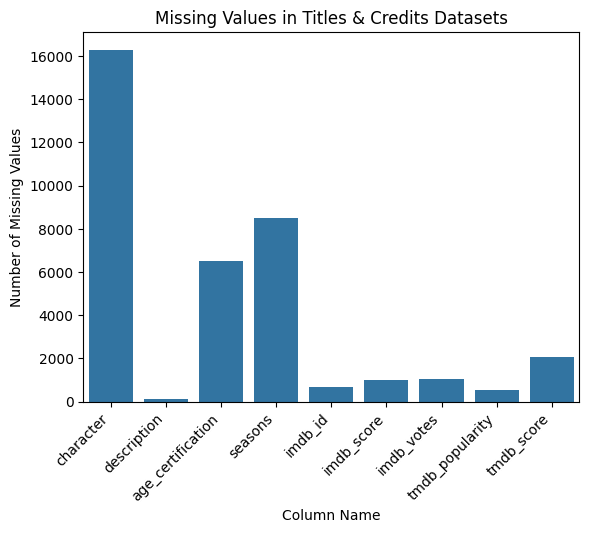

In [ ]:
# Visualizing the missing values

# Combine missing value counts from both datasets

Credits_null=CREDITS.isnull().sum().reset_index()
Titles_null=TITLES.isnull().sum().reset_index()
#We have used reset_index to convert the list to dataframe

Credits_null.columns=["Columns","Missing Values"]        #made columns for column name and missing value
Credits_null["Dataset"]="Credits"                        #add one more column for dataset name

Titles_null.columns=["Columns","Missing Values"]
Titles_null["Dataset"]="Titles"

Missing_Combined=pd.concat([Credits_null,Titles_null],axis=0)    #stacking them vertically (row-wise)
Missing_Combined=Missing_Combined[Missing_Combined["Missing Values"]>0]

import matplotlib.pyplot as plt
import seaborn as sns

#Visualizing Missing Values through bar Plot

plt.Figure(figsize=(14,7))
sns.barplot(data=Missing_Combined,x="Columns",y="Missing Values",hue="Dataset")
plt.xticks(rotation=45, ha='right')        #makes long column names easier to read without overlapping
plt.title('Missing Values in Titles & Credits Datasets')
plt.ylabel('Number of Missing Values')
plt.xlabel('Column Name')
plt.show()


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

In [ ]:
# Dataset Describe

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***